<a href="https://colab.research.google.com/github/MerveKaragulTabas/ML-Machine-Learning-/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

# Ingest the data to notebook

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In [11]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Preprocessing

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
for col in df.select_dtypes('int'):
    print(df[col].value_counts(), '\n\n')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
34     2
37     2
38     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64 


1    206
0     96
Name: sex, dtype: int64 


0    143
2     86
1     50
3     23
Name: cp, dtype: int64 


120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: t

In [17]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [18]:
df.drop(df[df['thal']==0].index, inplace=True)

In [19]:
df['thal'].value_counts()

2    165
3    117
1     18
Name: thal, dtype: int64

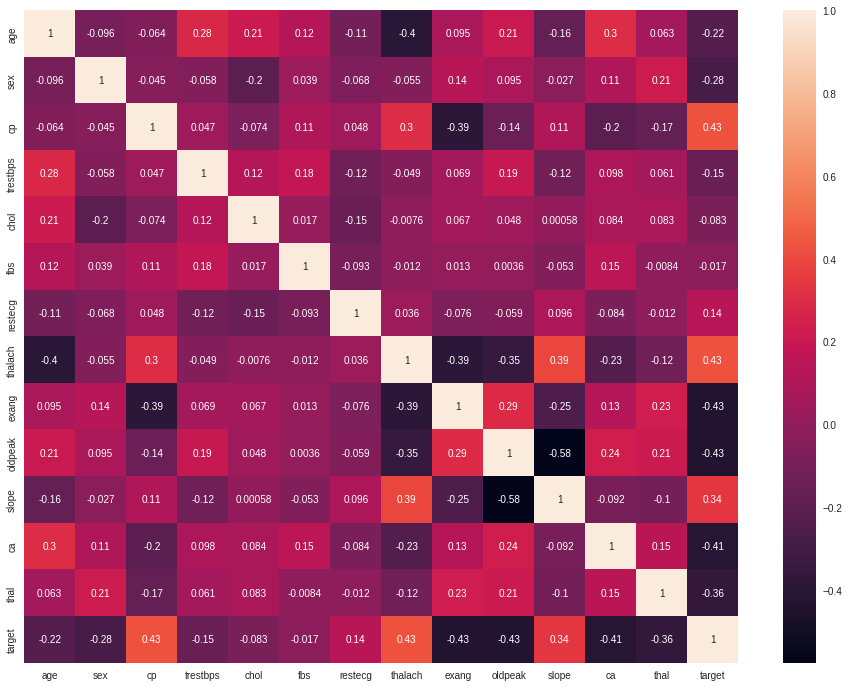

In [20]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)

# Implement Logistic Regression and Evaluate

In [21]:
X = df.drop('target', axis=1)
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement KNN and Evaluate

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
knn_pred = knn.predict(X_test_scaled)

In [28]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[33  6]
 [11 40]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.78      0.82        51

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(1 - recall_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

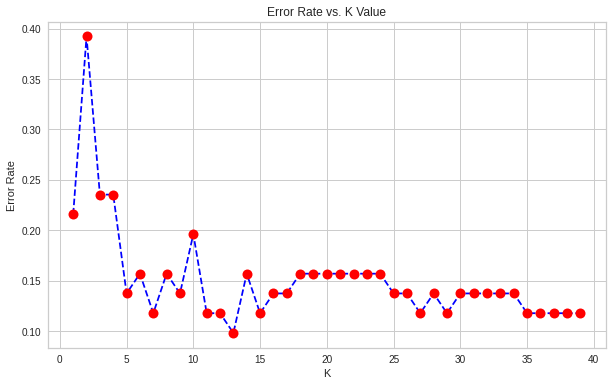

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)

In [32]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [33]:
knn_pred = knn.predict(X_test_scaled)

In [34]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[30  9]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.84      0.90      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [35]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=13), X_train_scaled, y_train, cv=10, n_jobs=-1, scoring=['recall'])

In [36]:
pd.DataFrame(scores)

,fit_time,score_time,test_recall
0,0.001944,0.004215,0.727273
1,0.001837,0.003985,0.727273
2,0.001530,0.003664,1.000000
3,0.001574,0.005973,0.818182
4,0.004008,0.007979,0.818182
5,0.001585,0.004033,0.818182
6,0.001335,0.003770,0.909091
7,0.001394,0.003927,0.909091
8,0.001342,0.003839,0.666667
9,0.001471,0.003102,0.916667


In [37]:
pd.DataFrame(scores)['test_recall'].mean()

0.831060606060606

In [38]:
grid_params = {'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1, 2], 'leaf_size': [20, 25, 30, 35, 40, 45],
              'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 17], 'metric': ['minkowski', 'manhattan', 'euclidean']}

In [39]:
cv = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid=grid_params, n_jobs=-1, verbose=1, scoring='recall')

In [41]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40, 45],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15,
                                         17],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [42]:
cv.best_score_

0.883399209486166

In [43]:
cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

In [44]:
knn_pred = cv.predict(X_test_scaled)

In [45]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[31  8]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.85      0.90      0.88        51

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



In [47]:
knn = KNeighborsClassifier(leaf_size=20, p=1, weights='distance', n_neighbors=15)

In [48]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=15, p=1, weights='distance')

In [49]:
knn_pred = knn.predict(X_test_scaled)

In [50]:
scores = cross_val_score(knn, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [51]:
pd.DataFrame(scores).mean()

0    0.875758
dtype: float64

In [52]:
knn_recall = recall_score(y_test, knn_pred)

In [53]:
knn_recall

0.9019607843137255

# Visually compare models based on your chosen metric

In [54]:
log_model = LogisticRegression(n_jobs=-1)

In [55]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=-1)

In [56]:
log_pred = log_model.predict(X_test_scaled)

In [57]:
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[32  7]
 [ 7 44]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.86      0.86      0.86        51

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



In [58]:
scores = cross_validate(log_model, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [59]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.102911,0.001583,0.818182
1,0.103613,0.002290,0.909091
2,0.102497,0.002193,1.000000
3,0.102422,0.001530,0.818182
4,0.101958,0.001470,0.909091
5,0.103057,0.001410,0.636364
6,0.102211,0.001409,1.000000
7,0.103103,0.001575,0.909091
8,0.101730,0.001301,0.666667
9,0.102047,0.001354,0.916667


In [60]:
pd.DataFrame(scores)['test_score'].mean()

0.8583333333333334

In [61]:
log_recall = recall_score(y_test, log_pred)

In [62]:
log_recall

0.8627450980392157

In [63]:
sv_model = SVC()

In [64]:
sv_model.fit(X_train_scaled, y_train)

SVC()

In [65]:
sv_pred = sv_model.predict(X_test_scaled)

In [66]:
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[35  4]
 [ 4 47]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.92      0.92      0.92        51

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



In [67]:
scores = cross_validate(sv_model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [68]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.004109,0.002206,0.636364
1,0.004840,0.002476,0.818182
2,0.004300,0.002352,0.909091
3,0.004205,0.002394,0.818182
4,0.003797,0.009484,0.909091
5,0.003794,0.002282,0.545455
6,0.003859,0.002285,0.909091
7,0.007777,0.002334,0.909091
8,0.004452,0.002317,0.916667
9,0.002669,0.001289,0.916667


In [69]:
pd.DataFrame(scores)['test_score'].mean()

0.8287878787878789

In [71]:
grid_param = {'C':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [1, 2, 3, 4],
             'gamma':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 'scale', 'auto'],
             'random_state':[42]}

In [72]:
cv = GridSearchCV(SVC(random_state=42), param_grid=grid_param, n_jobs=-1, scoring='recall')

In [73]:
cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3,
                                   'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42]},
             scoring='recall')

In [74]:
cv.best_score_

1.0

In [75]:
cv.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

In [76]:
cv.best_estimator_

SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [77]:
sv_pred = cv.predict(X_test_scaled)

In [78]:
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[ 9 30]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        39
           1       0.63      1.00      0.77        51

    accuracy                           0.67        90
   macro avg       0.81      0.62      0.57        90
weighted avg       0.79      0.67      0.60        90



In [79]:
svc_tuned = SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [80]:
scores = cross_validate(svc_tuned, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [81]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.004788,0.005089,1.0
1,0.006135,0.005797,1.0
2,0.006978,0.002388,1.0
3,0.004269,0.002268,1.0
4,0.006875,0.002308,1.0
5,0.005425,0.005999,1.0
6,0.006168,0.002304,1.0
7,0.006290,0.002043,1.0
8,0.004231,0.002784,1.0
9,0.004060,0.001531,1.0


In [82]:
sv_recall = recall_score(y_test, sv_pred)

In [83]:
sv_recall

1.0

# Chose best model and make a random prediction 

In [84]:
plt.figure(figsize=(10, 6))

rec_df = pd.DataFrame({'knn_recall_score': knn_recall,
              'support_vector_recall_score': sv_recall,
              'log_reg_recall_score': log_recall}, index=[0])

<Figure size 720x432 with 0 Axes>

In [85]:
rec_df

,knn_recall_score,support_vector_recall_score,log_reg_recall_score
0,0.901961,1.0,0.862745


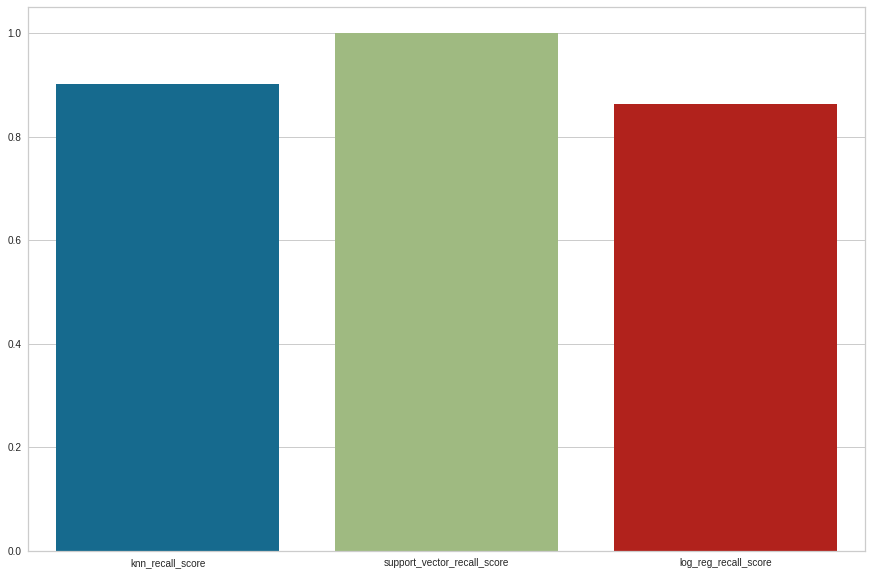

In [86]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values)